In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/winequality-red.csv',delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


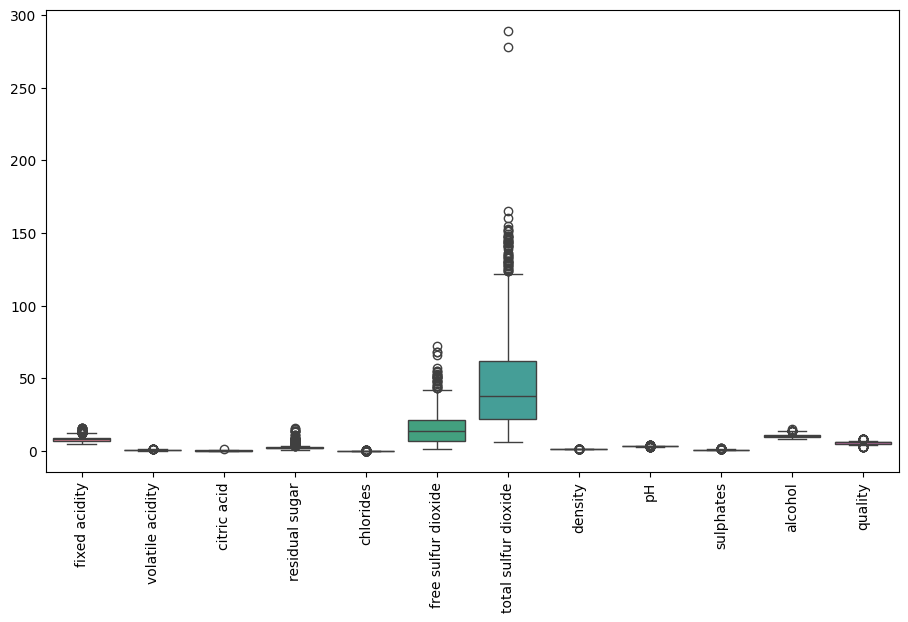

In [8]:
plt.figure(figsize=(11,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

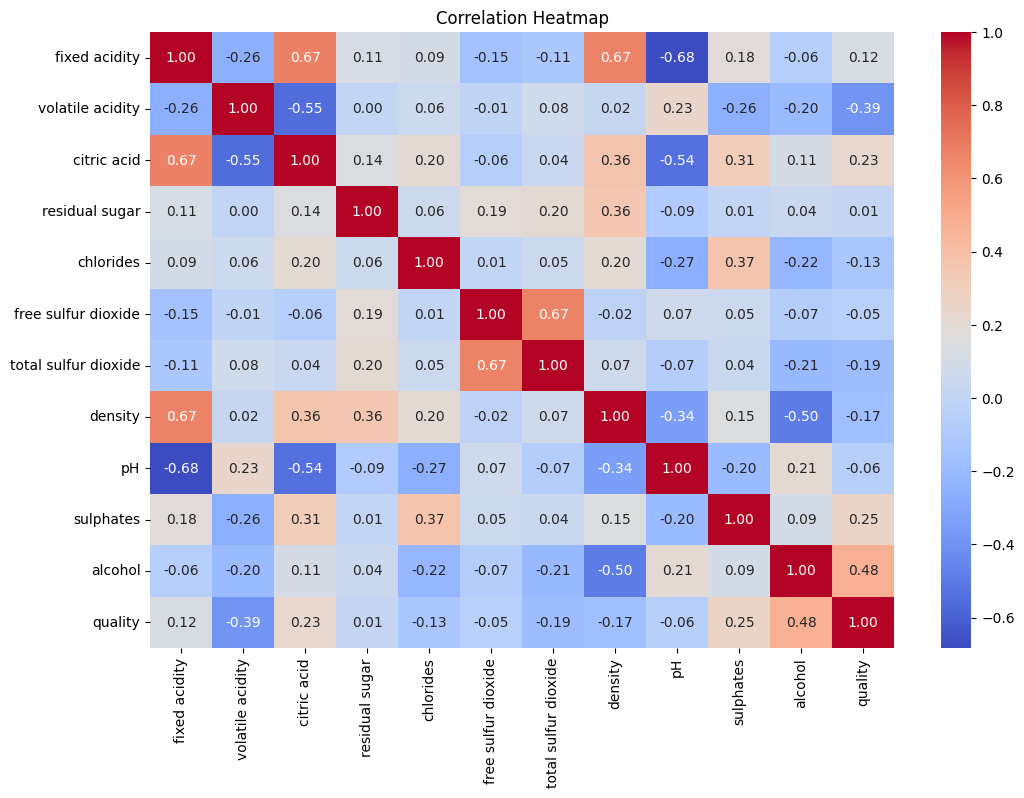

In [9]:
corr=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# calculate summary statistics
mean = data['total sulfur dioxide'].mean()
std  = data['total sulfur dioxide'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
data = data[(data['total sulfur dioxide'] >= lower_bound)
                & (data['total sulfur dioxide'] <= upper_bound)]


Lower Bound : -19.322856586366754
Upper Bound : 112.25844132682954


In [11]:
# calculate summary statistics
mean = data['free sulfur dioxide'].mean()
std  = data['free sulfur dioxide'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
data = data[(data['free sulfur dioxide'] >= lower_bound)
                & (data['free sulfur dioxide'] <= upper_bound)]


Lower Bound : -4.390594296896335
Upper Bound : 34.607184158647485


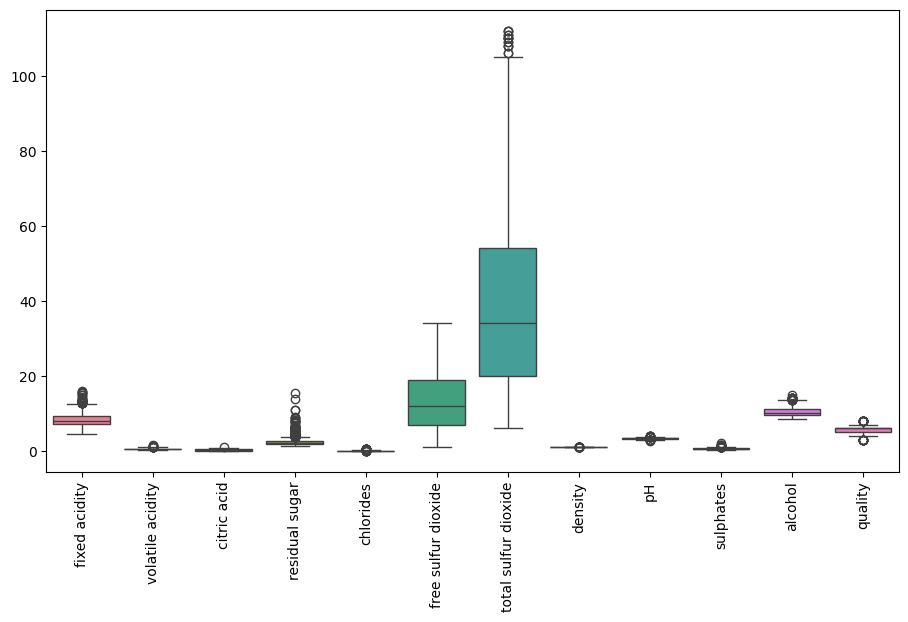

In [12]:
plt.figure(figsize=(11,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [13]:
scaler=StandardScaler()
X=data.drop('quality',axis=1)
y=data['quality']
X_scaled=scaler.fit_transform(X)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [18]:
X_train=PCA(n_components=5).fit_transform(X_train)
X_test=PCA(n_components=5).fit_transform(X_test)

In [23]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred=lin.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.4334254929262056

In [25]:
mdoels=[DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for i in mdoels:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(i)
  print(r2_score(y_test,y_pred)*100)
  print("-"*32)

DecisionTreeRegressor()
1.6318298496516448
--------------------------------
RandomForestRegressor()
53.18430143014301
--------------------------------
GradientBoostingRegressor()
47.398835450537405
--------------------------------
